# Titanic - Machine Learning from Disaster

### Objective
Create a model that predicts which passengers survived the Titanic shipwreck.

### Data
The *train.csv* dataset will be used to train the machine learning models, whereas the *test.csv* dataset will be used to see how well the models perform on unseen data.

**DATA DICTIONARY**

|Variable|Definition|Key or Observation|
|:------:|:--------:|----------------|
|PassengerId|Passager identification||
|Survived|Survival|0 = No, 1 = Yes|
|Pclass|Ticket class|1 = 1st/Upper, 2 = 2nd/Middle, 3 = 3rd/Lower|
|Name|Passager name||
|Sex|Sex|male or female|
|Age|Age in years|Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5|
|SibSp|# of siblings / spouses aboard the Titanic|Sibling = brother, sister, stepbrother, stepsister <br> Spouse = husband, wife (mistresses and fiancés were ignored)|
|Parch|# of parents / children aboard the Titanic|Parent = mother, father <br> Child = daughter, son, stepdaughter, stepson <br> Some children travelled only with a nanny, therefore parch=0 for them.|
|Ticket|Ticket number||
|Fare|Passenger fare||
|Cabin|Cabin number||
|Embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

### 1. Setting the machine enviroment


#### 1.1 Importing packages

In [145]:
import pandas # for data manipulation and analysis
import numpy # for numeric, matrix, array, logical operations
import sklearn.ensemble # for random florest model
import sklearn.preprocessing # for data transformation
import seaborn # for data visualization

#### 1.2 Importing datasets

In [5]:
train = pandas.read_csv('train.csv', sep=',')
test = pandas.read_csv('test.csv', sep=',')

### 2. Analysing raw data

#### 2.1 Data structure 

In [5]:
# seeing sample train data
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 2.2 Basic stats

**SURVIVORS x VICTIMS**

In [39]:
# calculating totals of each group
total = train['Survived'].size
survivors = train['Survived'].sum()
victims = total - survivors

# % of each group
survivors_percentage = str(round(survivors/total*100,2)) + '%'
victims_percentage = str(round(victims/total*100,2)) + '%'

print('# of survivors: ',survivors,' (',survivors_percentage,')', sep='')
print('# of victims: ',victims,' (',victims_percentage,')', sep='')

# of survivors: 342 (38.38%)
# of victims: 549 (61.62%)


**PASSENGER BY TICKET CLASS**

In [40]:
# get unique values and counts of each ticket class
unique_pclass, count_pclass = numpy.unique(train['Pclass'], return_counts=True)

# put unique values and counts in a single array
pclass_unique_count = numpy.asarray((unique_pclass, count_pclass)).T

# retrieve counts for each class
pclass_1 = pclass_unique_count[0][1]
pclass_2 = pclass_unique_count[1][1]
pclass_3 = pclass_unique_count[2][1]

# how many survived in each class
survivors_by_class = train.groupby('Pclass')['Survived'].sum()
pclass_1_survivors = survivors_by_class[1]
pclass_2_survivors = survivors_by_class[2]
pclass_3_survivors = survivors_by_class[3]

# how many victims in each class
pclass_1_victims = pclass_1 - pclass_1_survivors
pclass_2_victims = pclass_2 - pclass_2_survivors
pclass_3_victims = pclass_3 - pclass_3_survivors

# % of survivors per class
pclass_1_survivors_percentage = str(round(pclass_1_survivors/pclass_1*100,2)) + '%'
pclass_2_survivors_percentage = str(round(pclass_2_survivors/pclass_2*100,2)) + '%'
pclass_3_survivors_percentage = str(round(pclass_3_survivors/pclass_3*100,2)) + '%'

# table of results
pandas.DataFrame({'Ticket': ['Class 1','Class 2','Class 3'],
                  'Survivors': [pclass_1_survivors, pclass_2_survivors, pclass_3_survivors],
                  'Victims': [pclass_1_victims, pclass_2_victims, pclass_3_victims],
                  'Total': [pclass_1, pclass_2, pclass_3],
                  "Percentage of Survivors": [pclass_1_survivors_percentage, pclass_2_survivors_percentage, pclass_3_survivors_percentage]})

,Ticket,Survivors,Victims,Total,Percentage of Survivors
0,Class 1,136,80,216,62.96%
1,Class 2,87,97,184,47.28%
2,Class 3,119,372,491,24.24%


**PASSENGER BY SEX**

In [62]:
# get unique values and counts of each sex
unique_sex, count_sex = numpy.unique(train['Sex'], return_counts=True)

# put unique values and counts in a single array
sex_unique_count = numpy.asarray((unique_sex, count_sex)).T

# retrieve counts for each class
sex_female = sex_unique_count[0][1]
sex_male = sex_unique_count[1][1]

# how many of each sex survived 
survivors_by_sex = train.groupby('Sex')['Survived'].sum()
sex_female_survivors = survivors_by_sex[0]
sex_male_survivors = survivors_by_sex[1]

# how many victims in each sex
sex_female_victims = sex_female - sex_female_survivors
sex_male_victims = sex_male - sex_male_survivors

# % of survivors per sex
sex_female_survivors_percentage = str(round(sex_female_survivors/sex_female*100,2)) + '%'
sex_male_survivors_percentage = str(round(sex_male_survivors/sex_male*100,2)) + '%'

# table of results
pandas.DataFrame({'Sex': ['Female','Male'],
                  'Survivors': [sex_female_survivors, sex_male_survivors],
                  'Victims': [sex_female_victims, sex_male_victims],
                  'Total': [sex_female, sex_male],
                  "Percentage of Survivors": [sex_female_survivors_percentage, sex_male_survivors_percentage]})

,Sex,Survivors,Victims,Total,Percentage of Survivors
0,Female,233,81,314,74.2%
1,Male,109,468,577,18.89%


**PASSENGER BY AGE**

In [105]:
print("It doesn't include the", train['Age'].isna().sum(), 'passengers who age is unknown.')

It doesn't include the 177 passengers who age is unknown.


In [106]:
# Extracting statistics from describe and transforming then into dataframes (reset_index)
passengers_by_age = train.describe()['Age'].reset_index()
victims_by_age = train.groupby('Survived').describe()['Age'].loc[0].reset_index()
survivors_by_age = train.groupby('Survived').describe()['Age'].loc[1].reset_index()

# Merge all stats into a single table
survivors_victims_by_age = pandas.merge(survivors_by_age, victims_by_age, on='index')
survivors_victims_passengers_by_age = pandas.merge(survivors_victims_by_age, passengers_by_age, on='index')
survivors_victims_passengers_by_age.rename(columns={'index': 'Stats', 1: 'Survivors', 0: 'Victims', 'Age': 'Passengers'})

,Stats,Survivors,Victims,Passengers
0,count,290.000000,424.000000,714.000000
1,mean,28.343690,30.626179,29.699118
2,std,14.950952,14.172110,14.526497
3,min,0.420000,1.000000,0.420000
4,25%,19.000000,21.000000,20.125000
5,50%,28.000000,28.000000,28.000000
6,75%,36.000000,39.000000,38.000000
7,max,80.000000,74.000000,80.000000


**SIBLING / SPOUSE BY PASSENGER**

In [107]:
# Extracting statistics from describe and transforming then into dataframes (reset_index)
sibling_spouse_by_passenger = train.describe()['SibSp'].reset_index()
sibling_spouse_by_victim = train.groupby('Survived').describe()['SibSp'].loc[0].reset_index()
sibling_spouse_by_survivor = train.groupby('Survived').describe()['SibSp'].loc[1].reset_index()

# Merge all stats into a single table
sibling_spouse_by_survivor_victim = pandas.merge(sibling_spouse_by_survivor, sibling_spouse_by_victim, on='index')
sibling_spouse_by_survivors_victims_passengers = pandas.merge(sibling_spouse_by_survivor_victim, sibling_spouse_by_passenger, on='index')
sibling_spouse_by_survivors_victims_passengers.rename(columns={'index': 'Stats', 1: 'Survivors', 0: 'Victims', 'SibSp': 'Passengers'})

,Stats,Survivors,Victims,Passengers
0,count,342.000000,549.000000,891.000000
1,mean,0.473684,0.553734,0.523008
2,std,0.708688,1.288399,1.102743
3,min,0.000000,0.000000,0.000000
4,25%,0.000000,0.000000,0.000000
5,50%,0.000000,0.000000,0.000000
6,75%,1.000000,1.000000,1.000000
7,max,4.000000,8.000000,8.000000


**PARENT / CHILD BY PASSENGER**

In [109]:
# Extracting statistics from describe and transforming then into dataframes (reset_index)
parent_child_by_passenger = train.describe()['Parch'].reset_index()
parent_child_by_victim = train.groupby('Survived').describe()['Parch'].loc[0].reset_index()
parent_child_by_survivor = train.groupby('Survived').describe()['Parch'].loc[1].reset_index()

# Merge all stats into a single table
parent_child_by_survivor_victim = pandas.merge(parent_child_by_survivor, parent_child_by_victim, on='index')
parent_child_by_survivors_victims_passengers = pandas.merge(parent_child_by_survivor_victim, parent_child_by_passenger, on='index')
parent_child_by_survivors_victims_passengers.rename(columns={'index': 'Stats', 1: 'Survivors', 0: 'Victims', 'Parch': 'Passengers'})

,Stats,Survivors,Victims,Passengers
0,count,342.000000,549.000000,891.000000
1,mean,0.464912,0.329690,0.381594
2,std,0.771712,0.823166,0.806057
3,min,0.000000,0.000000,0.000000
4,25%,0.000000,0.000000,0.000000
5,50%,0.000000,0.000000,0.000000
6,75%,1.000000,0.000000,0.000000
7,max,5.000000,6.000000,6.000000


**PASSENGER BY PORT OF EMBARKATION**

In [127]:
# get unique values and counts of each ticket class
# it is necessary to convert train['Embarked'] to string due to the NA observations
unique_embarked, count_embarked = numpy.unique(train['Embarked'].astype(str), return_counts=True)

# put unique values and counts in a single array
embarked_unique_count = numpy.asarray((unique_embarked, count_embarked)).T

# retrieve counts for each class
embarked_c = embarked_unique_count[0][1]
embarked_q = embarked_unique_count[1][1]
embarked_s = embarked_unique_count[2][1]

# how many survived in each class
survivors_by_port = train.groupby('Embarked')['Survived'].sum()
embarked_c_survivors = survivors_by_port[0]
embarked_q_survivors = survivors_by_port[1]
embarked_s_survivors = survivors_by_port[2]

# how many victims in each class
embarked_c_victims = embarked_c - embarked_c_survivors
embarked_q_victims = embarked_q - embarked_q_survivors
embarked_s_victims = embarked_s - embarked_s_survivors

# % of survivors per class
embarked_c_survivors_percentage = str(round(embarked_c_survivors/embarked_c*100,2)) + '%'
embarked_q_survivors_percentage = str(round(embarked_q_survivors/embarked_q*100,2)) + '%'
embarked_s_survivors_percentage = str(round(embarked_s_survivors/embarked_s*100,2)) + '%'

# table of results
pandas.DataFrame({'Port': ['Cherbourg','Queenstown','Southampton'],
                  'Survivors': [embarked_c_survivors, embarked_q_survivors, embarked_s_survivors],
                  'Victims': [embarked_c_victims, embarked_q_victims, embarked_s_victims],
                  'Total': [embarked_c, embarked_q, embarked_s],
                  "Percentage of Survivors": [embarked_c_survivors_percentage, embarked_q_survivors_percentage, embarked_s_survivors_percentage]})

,Port,Survivors,Victims,Total,Percentage of Survivors
0,Cherbourg,93,75,168,55.36%
1,Queenstown,30,47,77,38.96%
2,Southampton,217,427,644,33.7%


### 3. Random Florest Model only with complete data

Only the information which had 891 obseervations in the training dataset was included.
That means the model only considered:
- ticket class (Pclass)
- passenger sex (Sex) 
- number of siblings / spouses abroad (SibSp)
- number of parents / children abroad (Parch)
- passenger fare (Fare)

#### 3.1 Separating classification variables (target) from explaining variables (features)

In [128]:
target = train['Survived'].values
features = train[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']]

#### 3.2 Transforming non-numeric into numeric data

Assign 0 = Female and 1 = Male

In [143]:
ordinal_encoder = sklearn.preprocessing.OrdinalEncoder()
encoded_sex = ordinal_encoder.fit_transform(features[['Sex']])

features.loc[:, 'Sex'] = encoded_sex

C:\Users\abner\AppData\Local\Temp\ipykernel_14088\1520072570.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.loc[:, 'Sex'] = encoded_sex


#### 3.3 Correlation between features

<Axes: >

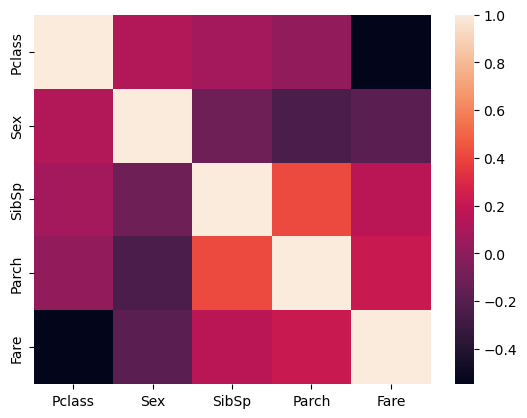

In [146]:
seaborn.heatmap(features.corr())

Ticket Class and Ticket Fare are negative correlated, as imagined (first class passengers paid a higher fare than others)

#### 3.4 Normalizing the data

Computing the z sccore of each feature, ensuring mean of 0 and variance of 1.

#### 3.2 Generating the Model

In [ ]:
model1 = sklearn.ensemble.RandomForestClassifier

### 3. Random Florest Model

#### 3.1 Step-by-Step Function

#### 3.2 Training data

##### 3.2.1 Deleting Rows with missing values

##### 3.2.2 Replacing missing values with the Mean

##### 3.2.3 Replacing missing values with the Median

##### 3.2.4 Assigning an unique category to missing values

##### 3.2.5 Using multiple imputation to replace missing values

#### 3.3 Predicting the outcome